# LIFE EXPECTANCY PREDICTOR USING DIFFERENT FACTORS

## ETL

In [63]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [64]:
df_life = df_data_1

In [65]:
## data from the year 2015 was obtained from the dataset
df_life = df_life[df_life['Year'] == 2015]

In [66]:
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


## DATA CLEANING

In [67]:
df_life.reset_index(inplace = True)

In [68]:
df_life.head()

,index,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [69]:
df_life.drop("index", axis = 1, inplace = True)

In [70]:
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [71]:
df_life.shape

(183, 22)

In [72]:
df_life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [73]:
df_life1 = df_life.sort_values(by = "Life expectancy ", ascending = False)

In [74]:
df_life1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
146,Slovenia,2015,Developed,88.0,74.0,0,NaN,0.0,NaN,18,...,95.0,NaN,95.0,0.1,2729.86383,263531.0,1.4,1.3,0.888,17.3
46,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,...,93.0,NaN,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
42,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,...,97.0,NaN,97.0,0.1,2375.11270,116985.0,1.0,1.0,0.854,14.3
34,Chile,2015,Developing,85.0,82.0,2,NaN,0.0,97.0,9,...,96.0,NaN,96.0,0.1,13653.22640,17762681.0,0.8,0.8,0.845,16.3
82,Japan,2015,Developed,83.7,55.0,2,NaN,0.0,NaN,35,...,99.0,NaN,96.0,0.1,34474.13736,127141.0,2.1,1.8,0.902,15.3


In [75]:
df_life1_1 = df_life.sort_values(by = "Life expectancy ", ascending = True)
df_life1_1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
143,Sierra Leone,2015,Developing,51.0,413.0,22,NaN,0.0,86.0,607,...,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
3,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
32,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.0,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
33,Chad,2015,Developing,53.1,356.0,46,NaN,0.0,46.0,418,...,52.0,NaN,46.0,2.8,777.248751,149413.0,8.5,8.4,0.394,7.3
27,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN


## DATA EXPLORATION

In [76]:
df_life2 = df_life[['Status', 'Life expectancy ']]

In [77]:
df_life2.head()

,Status,Life expectancy
0,Developing,65.0
1,Developing,77.8
2,Developing,75.6
3,Developing,52.4
4,Developing,76.4


In [78]:
df_life2 = df_life2.groupby(["Status"], as_index = False).mean()
df_life2

,Status,Life expectancy
0,Developed,80.709375
1,Developing,69.690066


In [79]:
df_life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [80]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [81]:
## Correlation coefficient table
df_life.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,NaN,1.000000,-0.779119,-0.241290,0.603775,0.043964,0.420848,-0.074617,0.516663,-0.271921,0.515602,-1.0,0.500300,-0.608345,0.454491,-0.048461,-0.475020,-0.475027,0.907364,0.818159
Adult Mortality,NaN,-0.779119,1.000000,0.188205,-0.606588,-0.042930,-0.231715,0.051196,-0.369920,0.212004,-0.372392,1.0,-0.322688,0.621012,-0.335870,0.046170,0.298016,0.302699,-0.657258,-0.546178
infant deaths,NaN,-0.241290,0.188205,1.000000,-0.614072,-0.014262,-0.086902,0.800859,-0.223562,0.994196,-0.129729,1.0,-0.117989,0.095837,-0.122286,0.271811,0.530544,0.530548,-0.207522,-0.208149
Alcohol,NaN,0.603775,-0.606588,-0.614072,1.000000,-0.212868,0.561207,-0.594612,0.922678,-0.614182,0.619855,-1.0,0.574532,0.000000,-0.328932,-0.972765,-0.697650,-0.705687,0.669250,0.892838
percentage expenditure,NaN,0.043964,-0.042930,-0.014262,-0.212868,1.000000,0.041100,-0.014629,0.037723,-0.014619,0.002150,-1.0,0.034701,-0.036393,-0.030800,-0.019062,-0.015428,-0.013887,0.014062,0.018593
Hepatitis B,NaN,0.420848,-0.231715,-0.086902,0.561207,0.041100,1.000000,0.015642,0.179551,-0.104716,0.594559,-1.0,0.915220,-0.383792,0.142116,-0.047558,-0.057951,-0.099965,0.327169,0.334051
Measles,NaN,-0.074617,0.051196,0.800859,-0.594612,-0.014629,0.015642,1.000000,-0.128184,0.764908,-0.028342,1.0,-0.001623,-0.026580,-0.077234,0.127717,0.343274,0.338294,-0.074674,-0.067796
BMI,NaN,0.516663,-0.369920,-0.223562,0.922678,0.037723,0.179551,-0.128184,1.000000,-0.234982,0.212450,-1.0,0.197686,-0.292453,0.345978,0.001515,-0.472508,-0.489716,0.589784,0.566204
under-five deaths,NaN,-0.271921,0.212004,0.994196,-0.614182,-0.014619,-0.104716,0.764908,-0.234982,1.000000,-0.147457,1.0,-0.137863,0.122604,-0.127670,0.310687,0.522142,0.521006,-0.229571,-0.227530


In [82]:
## Creating a new dataset using features that correlated moderately or strongly with life expectancy
df_life = df_life.rename(columns = {"Income composition of resources" : "ICOR"})
df_life3 = df_life[['Country','Status','Adult Mortality', 'Alcohol',' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS','GDP','ICOR', 'Schooling','Life expectancy ']]

In [83]:
df_life4 = df_life3[df_life3['Status'] == "Developing"]
df_life5 = df_life3[df_life3['Status'] == "Developed"]

### SCHOOLING VS LIFE EXPECTANCY

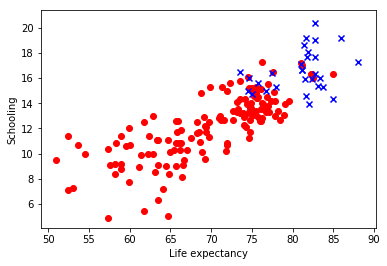

In [84]:
plt.scatter('Life expectancy ', 'Schooling', data = df_life4, marker = 'o', color = "red")
plt.scatter('Life expectancy ', 'Schooling', data = df_life5, marker = 'x', color = "blue")
plt.xlabel("Life expectancy")
plt.ylabel("Schooling")
plt.show()

### GDP VS LIFE EXPECTANCY

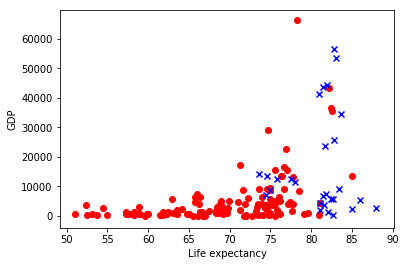

In [85]:
plt.scatter('Life expectancy ', 'GDP', data = df_life4, marker = 'o', color = "red")
plt.scatter('Life expectancy ', 'GDP', data = df_life5, marker = 'x', color = "blue")
plt.xlabel("Life expectancy")
plt.ylabel("GDP")
plt.show()

In [86]:
df_life3[df_life3["GDP"] > 60000]

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,ICOR,Schooling,Life expectancy
129,Qatar,Developing,68.0,NaN,69.3,99.0,99.0,0.1,66346.52267,0.855,13.4,78.2


### ADULT MORTALITY VS LIFE EXPECTANCY

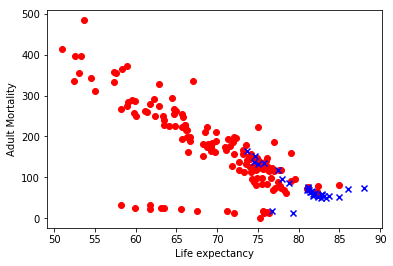

In [87]:
plt.scatter('Life expectancy ', 'Adult Mortality', data = df_life4, marker = 'o', color = "red")
plt.scatter('Life expectancy ', 'Adult Mortality', data = df_life5, marker = 'x', color = "blue")
plt.xlabel("Life expectancy")
plt.ylabel("Adult Mortality")
plt.show()

In [88]:
df_life6 = df_life3.sort_values(by = "Adult Mortality", ascending = False)
df_life6.head(10)

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,ICOR,Schooling,Life expectancy
92,Lesotho,Developing,484.0,NaN,32.6,9.0,93.0,9.3,173.828930,0.495,10.7,53.7
143,Sierra Leone,Developing,413.0,NaN,24.4,86.0,86.0,0.5,587.538233,0.431,9.5,51.0
27,Côte d'Ivoire,Developing,397.0,NaN,28.0,81.0,83.0,1.9,NaN,NaN,NaN,53.3
32,Central African Republic,Developing,397.0,NaN,22.7,47.0,47.0,4.4,348.381417,0.347,7.1,52.5
155,Swaziland,Developing,373.0,NaN,32.3,84.0,9.0,7.1,3136.925110,0.541,11.4,58.9
98,Malawi,Developing,365.0,NaN,19.6,88.0,88.0,4.8,362.657544,0.473,10.8,58.3
30,Cameroon,Developing,357.0,NaN,29.0,83.0,84.0,3.5,1244.429421,0.514,10.4,57.3
33,Chad,Developing,356.0,NaN,19.1,52.0,46.0,2.8,777.248751,0.394,7.3,53.1
110,Mozambique,Developing,355.0,NaN,22.6,8.0,8.0,3.9,528.312560,0.414,9.1,57.6
118,Nigeria,Developing,344.0,NaN,25.4,49.0,49.0,3.7,2655.157977,0.525,10.0,54.5


## HIV/AIDS VS LIFE EXPECTANCY

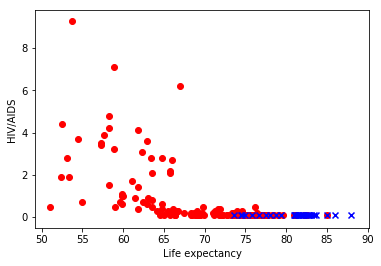

In [89]:
plt.scatter('Life expectancy ', ' HIV/AIDS', data = df_life4, marker = 'o', color = "red")
plt.scatter('Life expectancy ', ' HIV/AIDS', data = df_life5, marker = 'x', color = "blue")
plt.xlabel("Life expectancy")
plt.ylabel("HIV/AIDS")
plt.show()

In [90]:
df_life7 = df_life3.sort_values(by = " HIV/AIDS", ascending = False)
df_life7.head(10)

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,ICOR,Schooling,Life expectancy
92,Lesotho,Developing,484.0,NaN,32.6,9.0,93.0,9.3,173.828930,0.495,10.7,53.7
155,Swaziland,Developing,373.0,NaN,32.3,84.0,9.0,7.1,3136.925110,0.541,11.4,58.9
182,Zimbabwe,Developing,336.0,NaN,31.8,88.0,87.0,6.2,118.693830,0.507,10.3,67.0
98,Malawi,Developing,365.0,NaN,19.6,88.0,88.0,4.8,362.657544,0.473,10.8,58.3
32,Central African Republic,Developing,397.0,NaN,22.7,47.0,47.0,4.4,348.381417,0.347,7.1,52.5
52,Equatorial Guinea,Developing,32.0,NaN,24.5,17.0,16.0,4.2,1347.312570,0.582,9.2,58.2
181,Zambia,Developing,33.0,NaN,23.4,9.0,9.0,4.1,1313.889646,0.576,12.5,61.8
110,Mozambique,Developing,355.0,NaN,22.6,8.0,8.0,3.9,528.312560,0.414,9.1,57.6
118,Nigeria,Developing,344.0,NaN,25.4,49.0,49.0,3.7,2655.157977,0.525,10.0,54.5
149,South Africa,Developing,328.0,NaN,51.1,75.0,75.0,3.6,5769.772580,0.665,13.0,62.9


### ICOR VS LIFE EXPECTANCY

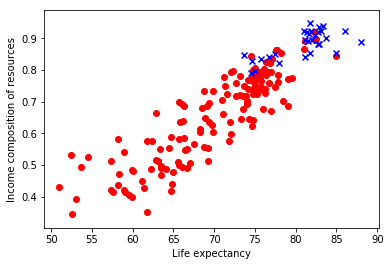

In [91]:
plt.scatter('Life expectancy ', 'ICOR', data = df_life4, marker = 'o', color = "red")
plt.scatter('Life expectancy ', 'ICOR', data = df_life5, marker = 'x', color = "blue")
plt.xlabel("Life expectancy")
plt.ylabel("Income composition of resources")
plt.show()

In [92]:
df_life8 = df_life3.sort_values(by = "ICOR", ascending = False)
df_life8.head(10)

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,ICOR,Schooling,Life expectancy
119,Norway,Developed,59.0,5.97,61.2,95.0,95.0,0.1,7455.24654,0.948,17.7,81.8
157,Switzerland,Developed,49.0,NaN,57.4,97.0,97.0,0.1,8989.84240,0.938,16.0,83.4
7,Australia,Developed,59.0,NaN,66.6,93.0,93.0,0.1,56554.38760,0.937,20.4,82.8
62,Germany,Developed,68.0,NaN,62.3,94.0,95.0,0.1,41176.88158,0.924,17.1,81.0
144,Singapore,Developed,55.0,1.79,33.2,96.0,96.0,0.1,53629.73746,0.924,15.4,83.1
46,Denmark,Developed,71.0,NaN,58.8,93.0,93.0,0.1,5314.64416,0.923,19.2,86.0
114,Netherlands,Developed,57.0,NaN,62.1,95.0,95.0,0.1,44292.88473,0.923,18.1,81.9
78,Ireland,Developed,64.0,NaN,62.8,95.0,95.0,0.1,6664.14400,0.920,18.6,81.4
73,Iceland,Developed,49.0,NaN,61.0,92.0,92.0,0.1,5734.44360,0.919,19.0,82.7
31,Canada,Developing,64.0,NaN,67.0,91.0,91.0,0.1,43315.74400,0.919,16.3,82.2


### CORRELATION COEFFICIENT TABLE

In [93]:
df_life3.corr()

,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,ICOR,Schooling,Life expectancy
Adult Mortality,1.000000,-0.606588,-0.369920,-0.372392,-0.322688,0.621012,-0.335870,-0.657258,-0.546178,-0.779119
Alcohol,-0.606588,1.000000,0.922678,0.619855,0.574532,0.000000,-0.328932,0.669250,0.892838,0.603775
BMI,-0.369920,0.922678,1.000000,0.212450,0.197686,-0.292453,0.345978,0.589784,0.566204,0.516663
Polio,-0.372392,0.619855,0.212450,1.000000,0.661635,-0.403233,0.241974,0.464525,0.408363,0.515602
Diphtheria,-0.322688,0.574532,0.197686,0.661635,1.000000,-0.441413,0.227705,0.431936,0.410833,0.500300
HIV/AIDS,0.621012,0.000000,-0.292453,-0.403233,-0.441413,1.000000,-0.197693,-0.478788,-0.394161,-0.608345
GDP,-0.335870,-0.328932,0.345978,0.241974,0.227705,-0.197693,1.000000,0.521638,0.447275,0.454491
ICOR,-0.657258,0.669250,0.589784,0.464525,0.431936,-0.478788,0.521638,1.000000,0.917514,0.907364
Schooling,-0.546178,0.892838,0.566204,0.408363,0.410833,-0.394161,0.447275,0.917514,1.000000,0.818159
Life expectancy,-0.779119,0.603775,0.516663,0.515602,0.500300,-0.608345,0.454491,0.907364,0.818159,1.000000
